In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import norm

# Likelihood function

### The definition from Wikipedia: the likelihood function (often simply called the likelihood) describes the joint probability of the observed data as a function of the parameters of the chosen statistical model.

For a sample with size n, i.e., $X=\left\{ x_1, x_2,...,x_n \right\}$, the likelihood funtion is:
$$
L(X, \theta)=\prod_{k=1}^{n} f\left(x_{k}, \theta\right)
$$
where $\theta$ is the parameter to be estimated, and $f(\cdot)$ is a given probability mass/density function.

This definition may seem abstract. In plain words, given a set of sample data, we know/assume that the sample data follow a known distribution with unknown parameters, e.g., mean, then the likelihood function is a function of the unknown parameters, which reflect the likelihood of different parameter values, the bigger the more likely.

## 1. A simple example with 1 unknow parameter
### 1.1 Problem setting
In winter, the probability p of students getting cold is probably 0.05 or 0.06 or 0.07..., but we do not exactly know. Therefore, we need to firstly sample some students to obtain the statistical information. Let's sample 100 students from a school, among which 6 get cold. What is the most likely value of p? It is easy to see, 0.06.

| Sample size | # of students getting cold |
| --- | --- |
| 100 | 6   |

### 1.2 Does this result means p can not be 0.05 or 0.07 or any other value close to 0.06? The answer is NO. 

Actually, as we do not know the whole population, the **true** p can also take other values, say 0.05, but our statistical information tells that the likelihood is smaller. Then, the next question is **how to quantify the likelihood of p taking a given value?**

#### Step 1: assume a distribution.

For an individual student, he/she can only be at one of the two states, healthy or cold. Therefore, if we let y=1 denote cold and y=0 denote health, then y follows a Bernoulli distribution with unknow probability p. 
$$
f(y ; p)= \begin{cases}p & \text { if } y=1 \\ q=1-p & \text { if } y=0\end{cases}
$$

For a sample with n students, let x denote the number of students getting cold, then x follows a Binomical distribution (n, p).
$$
f(k, n, p)=\operatorname{Pr}(x=k)=\left(\begin{array}{l}
n \\
k
\end{array}\right) p^{k}(1-p)^{n-k}
$$
where k denotes there are exact k students getting cold.

#### Step 2: incorporate statistical information to formulate the likelihood function.

Let's look at the sample again. We have sampled 100 students, i.e., n = 100, among which 6 get cold, i.e., k = 6. Insert these know parameters to the PMF function, we obtain:
$$
f(6, 100, p)=\operatorname{Pr}(y=6)=\left(\begin{array}{l}
100 \\
6
\end{array}\right) p^{6}(1-p)^{100-6}
$$
where p is the only unknown left.

The above equation is actually the likelihood function:
$$
L(\theta, n=100, k=6) = f(6, 100, \theta)=\left(\begin{array}{l}
100 \\
6
\end{array}\right) \theta^{6}(1-\theta)^{100-6}
$$
The usage of $\theta$ instead of p here represents that it can be generalized to infer the parameters $\theta$ of any given distribution.

In [47]:
student_num = 100
cold_num = 6
p = np.linspace(0,0.1,11)
likelihood = binom.pmf(cold_num, student_num, p)

ind = np.argmax(likelihood)
print('Maximum likelihood is', np.max(likelihood))
print('The corresponding p value is', p[ind])

Maximum likelihood is 0.1656613084054898
The corresponding p value is 0.06


In [49]:
row1 = ['p value']
row1.extend(p)
row2 = ['Likelihood']
row2.extend(likelihood)
pd.DataFrame([row1, row2])

,0,1,2,3,4,5,6,7,8,9,10,11
0,p value,0.0,0.010000,0.020000,0.03000,0.040000,0.050000,0.060000,0.070000,0.08000,0.090000,0.100000
1,Likelihood,0.0,0.000463,0.011422,0.04961,0.105233,0.150015,0.165661,0.152855,0.12328,0.089463,0.059579


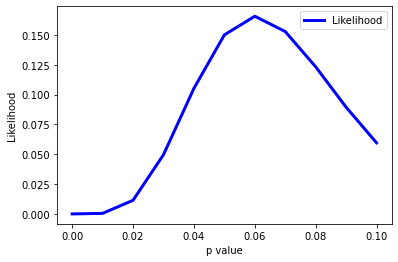

In [51]:
# plot the likelihood function
fig, ax = plt.subplots(1, 1)
ax.plot(p, likelihood, 'b-', lw=3, alpha=1, label='Likelihood')
plt.xlabel('p value')
plt.ylabel('Likelihood')
plt.legend()

## 2. An example with 2 unknow parameters
### 2.1 Problem setting: systolic blood pressure (SBP) in pregnancy
A sample of 5 pregnant women have their SBP taken, which is considered to be normally distributed.

| Person | 1   | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| SBP | 135   | 123 | 120 | 102 | 110 |

What are the most likely values of $\mu$ and $\sigma$?

### 2.2 Solution
#### Step 1: assume a distribution.
Here the distribution is given as a normal distribution with PDF:
$$
f(x; \mu, \sigma^2)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
$$

#### Step 2: incorporate statistical information to formulate the likelihood function.
For a sample with size n, i.e., $X=\left\{ x_1, x_2,...,x_n \right\}$, assume the each sample are independent, then the probability of $X$ is the product of the individual probabilities $x_n$. The most likely distribution should maximize this product.
$$
L(X, \theta)=\prod_{k=1}^{n} f\left(x_{k}, \theta\right)
$$

Now, back to the example.
$$
L\left(X ; \mu, \sigma^{2} \right)=\prod_{i=1}^{5} f_{i}\left(x_{i} ; \mu, \sigma^{2}\right)
$$
Calculate it.

In [69]:
sample = [135, 123, 120, 102, 110]

# potential mu and sigma value
mu = np.linspace(100, 138, 100)
sigma = np.linspace(8, 16, 100)

xaxis, yaxis = np.meshgrid(mu, sigma)

# likelihood
likelihood = 1
for s in sample:
    likelihood = likelihood * norm.pdf(s, loc=xaxis, scale=yaxis)

ind = np.unravel_index(likelihood.argmax(), likelihood.shape)
print('Maximum likelihood is', likelihood[ind])
print('The corresponding mu value is', mu[ind[1]])
print('The corresponding sigma value is', sigma[ind[0]])

Maximum likelihood is 4.509917711442565e-09
The corresponding mu value is 118.04040404040404
The corresponding sigma value is 11.313131313131313


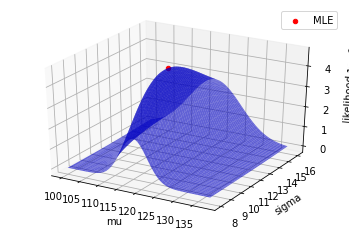

In [78]:
max_likelihood = likelihood[ind]
max_mu, max_sigma = mu[ind[1]], sigma[ind[0]]

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(xaxis, yaxis, likelihood, alpha = 0.6, color='blue')
ax.scatter(max_mu, max_sigma, max_likelihood * 1.01, color='red', label='MLE')
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("likelihood")
plt.legend()